In [175]:
import pandas as pd
import numpy as np

In [208]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,SelectPercentile, chi2

In [209]:
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [286]:
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None) #None gives us the dataset without column name i.e. header
	# retrieve numpy array
	dataset = data.values
	# get features and target labels
	features = dataset[:, :-1]
	target = dataset[:,-1]
	X=[]
	y=[]
	# type cast into required types    
	for j in range(1,int(len(features)/2)):
		X.append([float(i) for i in features[j]])
		y.append(int(target[j]))
	return X, y

In [287]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [288]:
# load the dataset
X, y = load_dataset('/Users/abiral/ns3/ns-allinone-3.31/ns-3.31/blackholedataset.csv')

[1.0, 2.0, 7.0, 49153.0, 6.0, 1.0, 0.0, 1.29491, 0.0, 0.0, 0.0, 0.0, 20760.0, 0.0, 10.0, 0.0, 10.0, 0.0]


In [289]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [290]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


[2.0, 12.0, 13.0, 654.0, 654.0, 1.00895, 1.0147, 1.00895, 1.0147, 0.00576, 0.0, 0.0, 48.0, 48.0, 1.0, 1.0, 0.0, 0.063606]
[2.0000e+00 1.3000e+01 6.5400e+02 6.5400e+02 1.0147e+00 4.8000e+01
 1.0000e+00 1.0000e+00 0.0000e+00 6.3606e-02]
[1.00000e+01 9.00000e+00 6.54000e+02 6.54000e+02 3.02925e+00 4.80000e+01
 1.00000e+00 1.00000e+00 0.00000e+00 4.64880e-02]


Feature 0: 49.080243
Feature 1: 26.251877
Feature 2: 64.910682
Feature 3: 64.761797
Feature 4: 64.912930
Feature 5: 20.343740
Feature 6: 47.828285
Feature 7: 12.724087
Feature 8: 34.237110
Feature 9: 5.441366
Feature 10: 4.103085
Feature 11: 6.634898
Feature 12: 47.853594
Feature 13: 5.849231
Feature 14: 59.606118
Feature 15: 200.064032
Feature 16: 216.894794
Feature 17: 46.371693


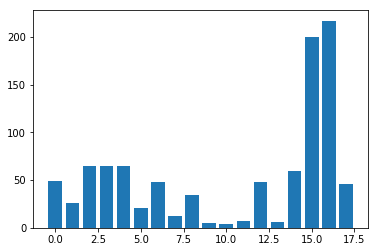

In [291]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [292]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score

#model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model = svm.SVC(gamma='auto')
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1_score = f1_score(y_test,y_pred,average='binary')

print('Accuracy: %.2f' % (accuracy*100))
print('ROC_AUC score: %.2f' % roc_auc)
print('F1 score: %.2f' % f1_score)

Accuracy: 99.60
ROC_AUC score: 1.00
F1 score: 0.99
